In [4]:
import os

import numpy as np
import xarray as xr
import rioxarray as rxr
import geopandas as gpd
import pandas as pd
import gval

from mosaic_inundation import Mosaic_inundation
from inundate_gms import Inundate_gms
from utils.shared_variables import PREP_PROJECTION as CRS

We will define a few variables including the HUC, the project's root directory, HAND output's directory, FIM output's directory, hydrofabric directory, and the path to the predicted inundation map.

In [5]:
# HUC8
hucs = ['12020001']

# base directory
base_dir = '/'

# outputs directory
outputs_dir = os.path.join(base_dir,'outputs')

# hydrofabric directory
hydrofabric_dir = os.path.join(outputs_dir, 'fim_4_3_3_4')

# fim outputs directour
fim_outputs_dir = os.path.join(outputs_dir, 'fim_files')

# path to predicted inundation file. 
predicted_raster_path = os.path.join(fim_outputs_dir,'inundation.tif')

Listing the contents of the hydrofabric_dir reveals a csv file and a directory with a HUC8.

In [6]:
os.listdir(hydrofabric_dir)

['12020001', 'fim_inputs.csv']

Printing the contents of fim_inputs.csv shows a file with all of the HUC8's and their corresponding branch IDs.

In [59]:
pd.read_csv(
    os.path.join(hydrofabric_dir, 'fim_inputs.csv'),
    dtype=str, header=None
).head()

,0,1
0,12020001,0
1,12020001,1077000002
2,12020001,1077000003
3,12020001,1077000004
4,12020001,1077000005


This prints the contents of the HUC8 directory.

In [60]:
os.listdir(os.path.join(hydrofabric_dir, hucs[0]))

['branch_ids.csv',
 'branch_ids.lst',
 'branch_polygons.gpkg',
 'branches',
 'nwm_catchments_proj_subset.gpkg',
 'nwm_catchments_proj_subset_levelPaths.gpkg',
 'nwm_headwater_points_subset.gpkg',
 'nwm_lakes_proj_subset.gpkg',
 'nwm_subset_streams.gpkg',
 'nwm_subset_streams_levelPaths.gpkg',
 'nwm_subset_streams_levelPaths_dissolved.gpkg',
 'nwm_subset_streams_levelPaths_dissolved_headwaters.gpkg',
 'usgs_elev_table.csv',
 'usgs_subset_gages.gpkg',
 'usgs_subset_gages_0.gpkg',
 'wbd.gpkg',
 'wbd8_clp.gpkg']

Prints all of the NWM streams for the given HUC8.

<Axes: >

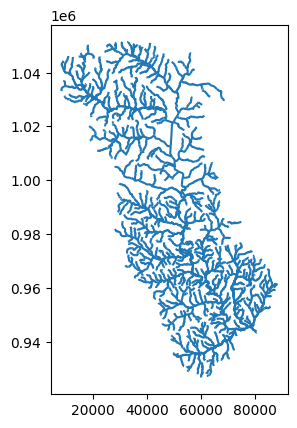

In [61]:
gpd.read_file(
    os.path.join(hydrofabric_dir, hucs[0], 'nwm_subset_streams.gpkg')
).plot()

Prints the NWM streams delineated by level path and only for stream orders 3 and above.

<Axes: >

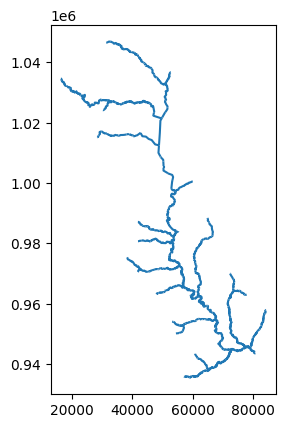

In [62]:
gpd.read_file(
    os.path.join(hydrofabric_dir, hucs[0], 'nwm_subset_streams_levelPaths.gpkg')
).plot()

Prints the contents of the Level Path delineated NWM streams GeoPandas.

In [63]:
gpd.read_file(
    os.path.join(hydrofabric_dir, hucs[0], 'nwm_subset_streams_levelPaths.gpkg')
).head()

,index,ID,to,order_,Lake,gages,Slope,Length,Shape_Length,mainstem,From_Node,To_Node,outlet_id,inlet_id,arbolate_sum,levpa_id,geometry
0,0,4454418,4454408,3,-9999,,0.00001,1054.0,0.010328,0,445400000001,445400000002,-1,-1,3.397133,1077000004,"LINESTRING (58919.453 935599.532, 58952.302 93..."
1,1,4454416,4454418,3,-9999,,0.00151,2343.0,0.023542,0,445400000003,445400000001,-1,2,2.343421,1077000004,"LINESTRING (57146.873 935883.360, 57182.546 93..."
2,2,4454412,4454410,3,-9999,,0.00124,2395.0,0.023513,0,445400000004,445400000005,-1,-1,6.216754,1077000004,"LINESTRING (59848.508 935868.384, 59868.622 93..."
3,3,4454410,4453862,3,-9999,,0.00106,1407.0,0.013615,0,445400000005,445400000006,-1,-1,7.624217,1077000004,"LINESTRING (61197.388 935775.517, 61255.515 93..."
4,4,4454408,4454412,3,-9999,,0.00001,424.0,0.004165,0,445400000002,445400000004,-1,-1,3.821391,1077000004,"LINESTRING (59589.643 935994.139, 59655.529 93..."


Prints the contents of the branches directory.

In [64]:
os.listdir(os.path.join(hydrofabric_dir, hucs[0],'branches'))

['0',
 '1077000001',
 '1077000002',
 '1077000003',
 '1077000004',
 '1077000005',
 '1077000006',
 '1077000007',
 '1077000008',
 '1077000009',
 '1077000010',
 '1077000011',
 '1077000012',
 '1077000013',
 '1077000014',
 '1077000015',
 '1077000016',
 '1077000017',
 '1077000018',
 '1077000019',
 '1077000020']

Prints the contents of branch 0 which represents the HAND outputs computed for the entire

In [65]:
os.listdir(os.path.join(hydrofabric_dir, hucs[0],'branches', '0'))

['demDerived_reaches_split_filtered_addedAttributes_crosswalked_0.gpkg',
 'gw_catchments_reaches_filtered_addedAttributes_0.tif',
 'gw_catchments_reaches_filtered_addedAttributes_crosswalked_0.gpkg',
 'hydroTable_0.csv',
 'rem_zeroed_masked_0.tif',
 'small_segments_0.csv',
 'src_full_crosswalked_0.csv',
 'usgs_elev_table.csv']

Plots the relative elevation model (REM) for branch 0 which is specific name for the HAND grid.

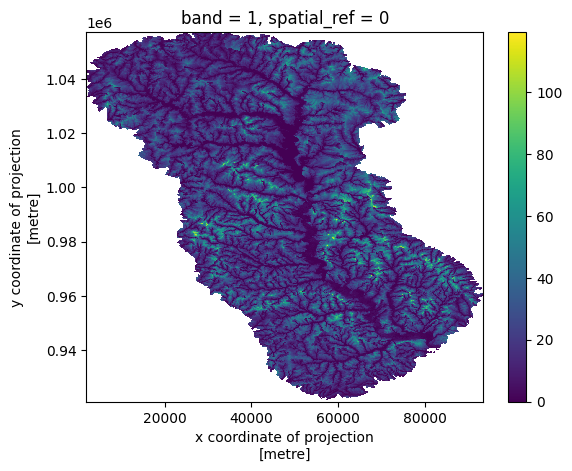

In [66]:
rxr.open_rasterio(
    os.path.join(hydrofabric_dir, hucs[0],'branches', '0', 'rem_zeroed_masked_0.tif'),
    mask_and_scale=True
).rio.reproject(dst_crs=CRS, resolution=50).plot()

Plots the catchments for branch 0.

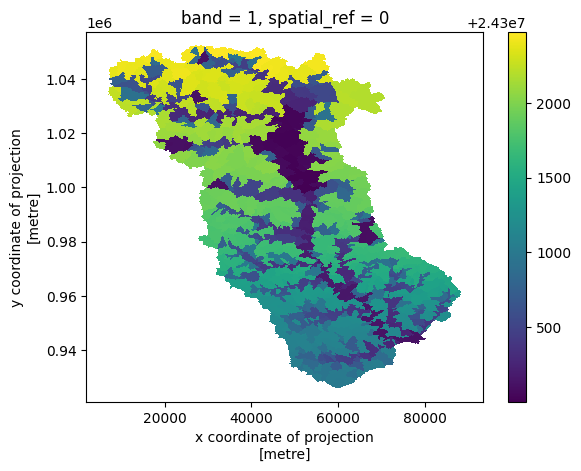

In [67]:
rxr.open_rasterio(
    os.path.join(hydrofabric_dir, hucs[0],'branches', '0', 'gw_catchments_reaches_filtered_addedAttributes_0.tif'),
    mask_and_scale=True
).rio.reproject(dst_crs=CRS, resolution=50).plot()

Plots the hydro table which contains a variety of reach scale information including synthetic rating curves (SRCs) and crosswalk information. feature_id represents the IDs within the NWM hydrofabric while HydroID represents the IDs in the dem derived stream network for HAND.

In [68]:
pd.read_csv(
    os.path.join(hydrofabric_dir, hucs[0],'branches', '0', 'hydroTable_0.csv')
).head()

,HydroID,feature_id,NextDownID,order_,Number of Cells,SurfaceArea (m2),BedArea (m2),TopWidth (m),LENGTHKM,AREASQKM,...,calb_coef_usgs,calb_coef_spatial,calb_coef_final,HUC,LakeID,subdiv_applied,channel_n,overbank_n,subdiv_discharge_cms,discharge_cms
0,24300001,4452342,24300002,5,20427,2042700.0,2.042700e+06,1451.827845,1.406985,0.9224,...,NaN,NaN,NaN,12020001,4451216,True,0.06,0.12,0.000000,0.000000
1,24300001,4452342,24300002,5,20824,2082400.0,2.082404e+06,1480.044208,1.406985,0.9224,...,NaN,NaN,NaN,12020001,4451216,True,0.06,0.12,106.444010,106.444010
2,24300001,4452342,24300002,5,21044,2104400.0,2.104425e+06,1495.680480,1.406985,0.9224,...,NaN,NaN,NaN,12020001,4451216,True,0.06,0.12,339.989510,339.989510
3,24300001,4452342,24300002,5,21624,2162400.0,2.162477e+06,1536.903379,1.406985,0.9224,...,NaN,NaN,NaN,12020001,4451216,True,0.06,0.12,670.379473,670.379473
4,24300001,4452342,24300002,5,22219,2221900.0,2.222042e+06,1579.192387,1.406985,0.9224,...,NaN,NaN,NaN,12020001,4451216,True,0.06,0.12,1086.383884,1086.383884


Plots the DEM derived reaches for branch 0.

<Axes: >

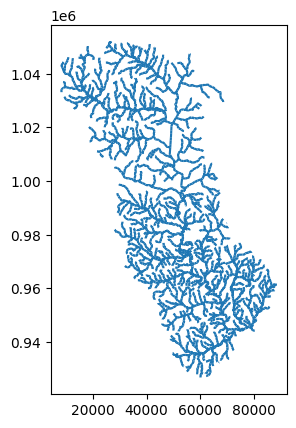

In [69]:
gpd.read_file(
    os.path.join(hydrofabric_dir, hucs[0],'branches', '0', 'demDerived_reaches_split_filtered_addedAttributes_crosswalked_0.gpkg')
).plot()

Now we will define the file with synthetic streamflows for the Base Level Engineering (BLE)

In [70]:
benchmark_flows = os.path.join(outputs_dir, 'ble_huc_12020001_flows_500yr.csv')
pd.read_csv(benchmark_flows)

,feature_id,discharge
0,1077621,1471.350711
1,1077623,1471.326076
2,1077625,1471.359773
3,1077643,1471.259531
4,4450864,18.868081
...,...,...
1177,4454480,60.251170
1178,4456676,97.672166
1179,4456680,202.475506
1180,4456682,748.358754


The following defines and illustrates the HUC8 boundary that will be used to constrain the inundation to the HUC8 region. We compute HAND on buffered rasters to avoid edge contamination therefore we must clip the inundation to the HUC8 boundary.

<Axes: >

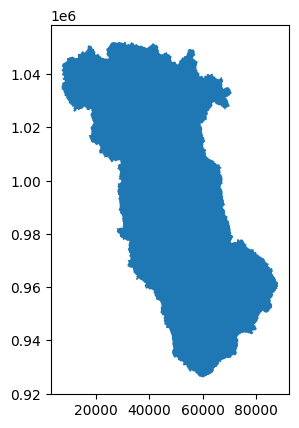

In [71]:
mask = os.path.join(hydrofabric_dir, hucs[0], 'wbd.gpkg')
gpd.read_file(mask).plot()

The following produces the inundation extents on a per branch / level path basis. 

In [72]:
map_file = Inundate_gms(hydrofabric_dir=hydrofabric_dir,
                        forecast=benchmark_flows,
                        hucs=hucs,
                        inundation_raster=predicted_raster_path)

The map file includes information that will be used later on to mosaic the inundation from each branch together.

In [23]:
map_file.head()

,huc8,branchID,inundation_rasters,depths_rasters,inundation_polygons
0,12020001,0,/foss_fim/outputs/fim_files/inundation_1202000...,None,None
1,12020001,1077000002,/foss_fim/outputs/fim_files/inundation_1202000...,None,None
2,12020001,1077000003,/foss_fim/outputs/fim_files/inundation_1202000...,None,None
3,12020001,1077000004,/foss_fim/outputs/fim_files/inundation_1202000...,None,None
4,12020001,1077000005,/foss_fim/outputs/fim_files/inundation_1202000...,None,None


This prints the outputs of the `Inundate_gms()`

In [24]:
os.listdir(fim_outputs_dir)

['.placeholder.txt',
 'inundation.tif',
 'inundation_12020001_0.tif',
 'inundation_12020001_1077000001.tif',
 'inundation_12020001_1077000002.tif',
 'inundation_12020001_1077000003.tif',
 'inundation_12020001_1077000004.tif',
 'inundation_12020001_1077000005.tif',
 'inundation_12020001_1077000006.tif',
 'inundation_12020001_1077000007.tif',
 'inundation_12020001_1077000008.tif',
 'inundation_12020001_1077000009.tif',
 'inundation_12020001_1077000010.tif',
 'inundation_12020001_1077000011.tif',
 'inundation_12020001_1077000012.tif',
 'inundation_12020001_1077000013.tif',
 'inundation_12020001_1077000014.tif',
 'inundation_12020001_1077000015.tif',
 'inundation_12020001_1077000016.tif',
 'inundation_12020001_1077000017.tif',
 'inundation_12020001_1077000018.tif',
 'inundation_12020001_1077000019.tif',
 'inundation_12020001_1077000020.tif']

Prints the inundation extents for branch 0.

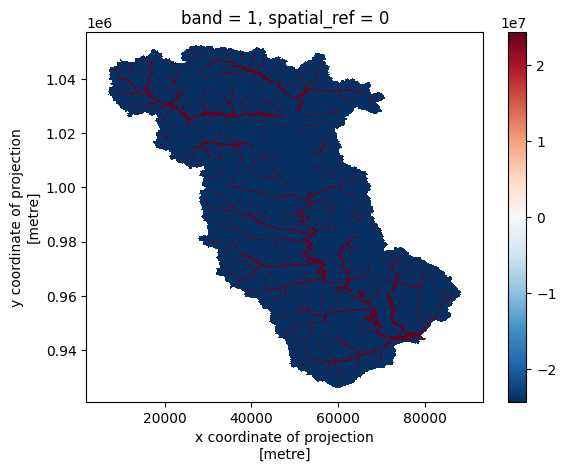

In [26]:
rxr.open_rasterio(
    os.path.join(fim_outputs_dir,'inundation_12020001_0.tif'),
    mask_and_scale=True
).rio.reproject(dst_crs=CRS, resolution=50).plot()

Plots the inundation extents for the first branch in the HUC8.

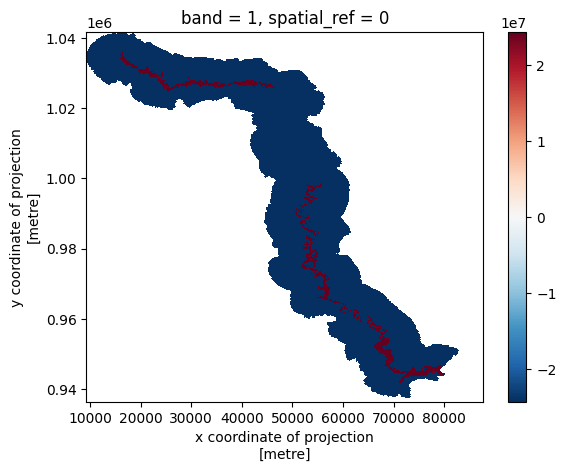

In [27]:
rxr.open_rasterio(
    os.path.join(fim_outputs_dir,'inundation_12020001_1077000001.tif'),
    mask_and_scale=True
).rio.reproject(dst_crs=CRS, resolution=50).plot()

In [28]:
Mosaic_inundation(map_file,
                  mosaic_attribute='inundation_rasters',
                  mosaic_output=predicted_raster_path,
                  mask=mask,
                  unit_attribute_name='huc8')

Mosaicing FIMs:   0%|                                                         | 0/1 [00:00<?, ?it/s]

... Masking ...


Mosaicing FIMs: 100%|█████████████████████████████████████████████████| 1/1 [00:08<00:00,  8.88s/it]


'/foss_fim/outputs/fim_files/inundation.tif'

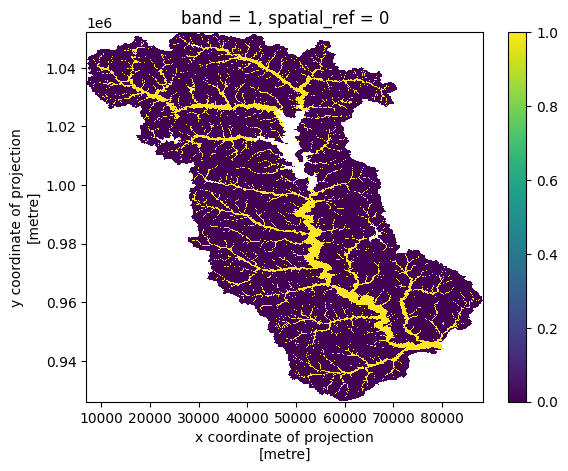

This loads the HAND generated map that we just created.

In [40]:
candidate = rxr.open_rasterio(predicted_raster_path, mask_and_scale=True)

Because FIMs are encoded with their respective HydroID with positive taken at inundated. We threshold these values to create a binary encoded map.

In [45]:
candidate.data = xr.where(candidate < 0, 0, candidate)
candidate.data = xr.where(candidate > 0, 1, candidate)

Plots the HAND based FIM.

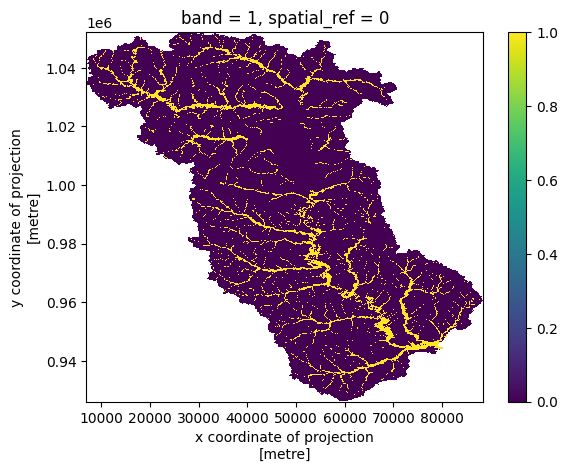

In [46]:
candidate.rio.reproject(dst_crs=candidate.rio.crs, resolution=50).plot()

This loads the BLE benchmark map for the HUC8 for a 500yr event.

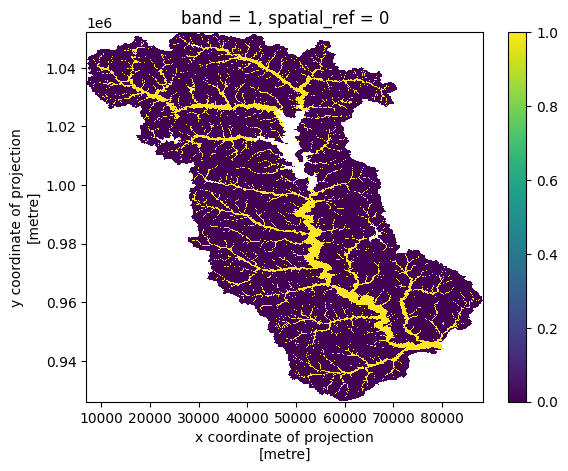

In [41]:
benchmark = rxr.open_rasterio(
    os.path.join(outputs_dir,'ble_huc_12020001_extent_500yr.tif'),
    mask_and_scale=True
)
benchmark.rio.reproject(dst_crs=CRS, resolution=50).plot()

In [35]:
agreement_map, cross_tab, metric_df = candidate.gval.categorical_compare(benchmark,
                                                                      positive_categories=[1],
                                                                      negative_categories=[0])

In [42]:
cross_tab

,band,candidate_values,benchmark_values,agreement_values,counts
0,1,0.0,0.0,0.0,41909439.0
1,1,1.0,0.0,6.0,315615.0
2,1,0.0,1.0,4.0,2184381.0
3,1,1.0,1.0,8.0,4723111.0


In [43]:
metric_df

,band,fn,fp,tn,tp,accuracy,critical_success_index,f_score,false_discovery_rate,false_negative_rate,...,fowlkes_mallows_index,matthews_correlation_coefficient,negative_likelihood_ratio,negative_predictive_value,positive_likelihood_ratio,positive_predictive_value,prevalence,prevalence_threshold,true_negative_rate,true_positive_rate
0,1,2184381.0,315615.0,41909439.0,4723111.0,0.949117,0.653889,0.790729,0.062638,0.316234,...,0.800585,0.774872,0.318615,0.950461,91.478775,0.937362,0.102554,0.094657,0.992525,0.683766


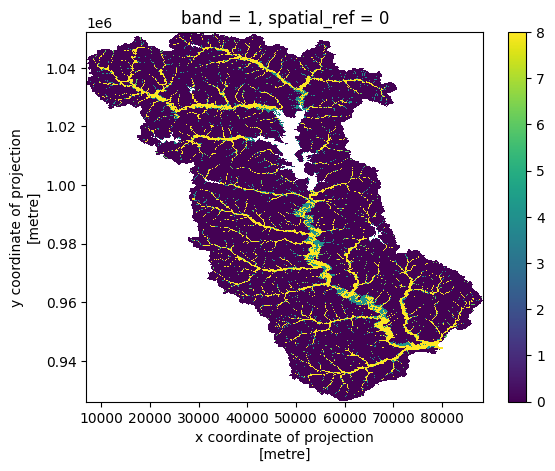

In [36]:
agreement_map.rio.reproject(dst_crs=CRS, resolution=50).plot()